## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, "r") as store:
        data = store[label]
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [3]:
f = "../hdf5_temp/condor_QCD_Pt_1000to1400+RunIISummer20UL18.hdf5"
event_vars, m = h5load(f, "vars")

In [4]:
event_vars

,ntracks,ngood_fastjets,ht,HLT_PFHT1050,HLT_TripleMu_5_3_3_Mass3p8_DZ,ngood_ak4jets,ngood_tracker_ak4jets,n_loose_ak4jets,n_tight_ak4jets,ht_loose,...,SUEP_pt_avg_CO,SUEP_pt_avg_b_CO,SUEP_pt_mean_scaled_CO,SUEP_S1_CO,SUEP_rho0_CO,SUEP_rho1_CO,SUEP_pt_CO,SUEP_eta_CO,SUEP_phi_CO,SUEP_mass_CO
0,150,3,3113.281250,True,True,9,9,9,9,3113.281250,...,8.910476,8.127713,0.052800,0.625034,0.000000,0.000000,396.701477,0.236412,-0.754356,1078.408811
1,117,2,1280.625000,True,True,5,5,5,5,1280.625000,...,6.212551,6.190559,0.075561,0.276121,0.000000,0.000000,196.313522,1.082938,2.837032,625.448272
2,118,2,2569.406250,True,True,7,7,7,7,2569.406250,...,8.826876,4.505802,0.068707,0.176358,0.040104,0.266839,701.793701,-0.796300,-2.111059,839.509445
3,108,3,3026.890625,True,True,7,7,7,7,3026.890625,...,9.669886,6.338934,0.092683,0.157134,0.000000,0.000000,713.619934,0.261820,0.128237,840.058282
4,99,2,2735.250000,True,True,4,4,4,4,2735.250000,...,15.588536,6.098870,0.149082,0.598530,0.000000,0.000000,873.413391,0.181060,-2.032667,426.389166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,70,2,2058.750000,True,True,3,3,3,3,2058.750000,...,15.149154,6.475468,0.272115,0.619376,0.000000,0.000000,644.247986,-0.777323,2.885523,366.217242
127,170,2,2448.000000,True,True,6,5,6,6,2448.000000,...,6.781515,3.439865,0.150846,0.437109,0.000000,0.000000,727.661438,0.005314,1.262672,829.536279
128,106,3,1831.937500,True,True,4,4,4,4,1831.937500,...,10.199431,10.221128,0.064585,0.305862,0.000000,0.000000,544.281067,0.789960,0.493303,1297.236986
129,121,2,3308.812500,True,True,8,8,8,8,3308.812500,...,10.021710,7.480756,0.112095,0.570096,0.000000,0.230898,780.919067,1.479415,-2.749147,1026.873643


In [5]:
for key in event_vars:
    print(key)

ntracks
ngood_fastjets
ht
HLT_PFHT1050
HLT_TripleMu_5_3_3_Mass3p8_DZ
ngood_ak4jets
ngood_tracker_ak4jets
n_loose_ak4jets
n_tight_ak4jets
ht_loose
ht_tight
ht_tracker
Pileup_nTrueInt
PV_npvs
PV_npvsGood
SUEP_nconst_IRM
SUEP_pt_avg_IRM
SUEP_pt_avg_b_IRM
SUEP_pt_mean_scaled_IRM
SUEP_S1_IRM
SUEP_rho0_IRM
SUEP_rho1_IRM
SUEP_pt_IRM
SUEP_eta_IRM
SUEP_phi_IRM
SUEP_mass_IRM
SUEP_dphi_SUEP_ISR_IRM
SUEP_nconst_CL
SUEP_pt_avg_CL
SUEP_pt_avg_b_CL
SUEP_pt_mean_scaled_CL
SUEP_S1_CL
SUEP_rho0_CL
SUEP_rho1_CL
SUEP_pt_CL
SUEP_eta_CL
SUEP_phi_CL
SUEP_mass_CL
SUEP_nconst_CO
SUEP_pt_avg_CO
SUEP_pt_avg_b_CO
SUEP_pt_mean_scaled_CO
SUEP_S1_CO
SUEP_rho0_CO
SUEP_rho1_CO
SUEP_pt_CO
SUEP_eta_CO
SUEP_phi_CO
SUEP_mass_CO


In [8]:
event_vars["resnet_SUEP_pred_model126"]

0    0.999991
1    1.000000
2    0.999988
3    0.999999
4    1.000000
Name: resnet_SUEP_pred_model126, dtype: float32

In [6]:
jets = event_vars["ngood_fastjets"]
htloose = event_vars["ht_loose"]
httight = event_vars["ht_tight"]

(array([96.,  0.,  0., 33.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

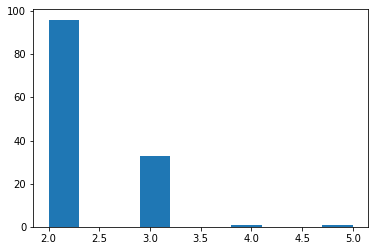

In [8]:
plt.hist(jets)

322103.359375
322103.359375


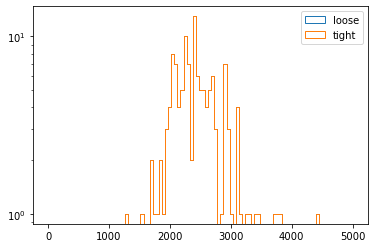

In [9]:
plt.hist(htloose, bins=np.linspace(0, 5000, 100), histtype="step", label="loose")
plt.hist(httight, bins=np.linspace(0, 5000, 100), histtype="step", label="tight")
plt.yscale("log")
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))